In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import scipy.optimize as opt

In [12]:
data = scio.loadmat('ex3data1.mat')
x_input=data['X']
y_input=data['y'].flatten()
m=y_input.size
n=x_input.shape[1]

In [13]:
#select 100 random data points to display
rand_inec=np.random.permutation(range(m))
selected=x_input[rand_inec[0:100],:]

In [14]:
def display_data(x):
    (m, n) = x.shape

    # Set example_width automatically if not passed in
    example_width = np.round(np.sqrt(n)).astype(int)
    example_height = (n / example_width).astype(int)

    # Compute the number of items to display
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                              pad + display_rows * (example_height + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(x[curr_ex]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          x[curr_ex].reshape((example_height, example_width)) / max_val
            curr_ex += 1

        if curr_ex > m:
            break

    # Display image
    plt.figure()
    plt.imshow(display_array, cmap='gray', extent=[-1, 1, -1, 1])
    plt.axis('off')


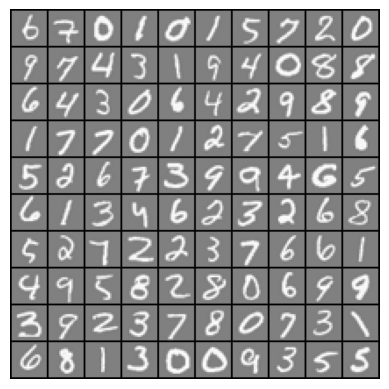

In [15]:
display_data(selected)

In [16]:
def sigmoid(z):
    
    h=1/(1+np.exp(-z))
    return h

In [17]:
def costFunctionReg(x,y,theta,l):
    (m,n)=x.shape
    z=np.dot(x,theta)
    
    h=sigmoid(z)
    
    log_h=np.log(h)
    h_1=np.subtract(1,h)
    log_h_1=np.log(h_1)
    y_1=np.subtract(1,y)
    
    J1=np.subtract(-y * log_h, y_1 * log_h_1)
    r=(l/(2*m))*(np.sum(np.square(theta[1:])))
    J=(1/m)*np.sum(J1)+r
    ######################################################  
    #grad
 
    E=np.subtract(h,y)
    grad=(1/m)*np.dot(x.T,E)
    grad[1:]=grad[1:]+(l/m)*theta[1:]

    
    return J , grad

In [18]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape((3, 5)).T/10]
y_t = np.array([1, 0, 1, 0, 1])
lmda_t = 3
cost, grad = costFunctionReg(X_t,y_t,theta_t,lmda_t)

In [19]:
grad

array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296])

In [20]:
def one_vs_all(x, y, num_labels, lmd):
    
    (m, n) = x.shape
    all_theta = np.ones((num_labels, n + 1))

    # Add ones to the X data 2D-array
    x = np.c_[np.ones(m), x]
    theta_i = np.zeros(n+1)
    for i in range(1,num_labels+1):
        
        yi=np.where(y==i,1,0)
        def cost_func(t):
            return costFunctionReg(x,yi,t,lmd)[0]
        def grad_func(t):
            return costFunctionReg(x,yi,t,lmd)[1]
            
        theta, *unused = opt.fmin_cg(cost_func, fprime=grad_func, x0=theta_i, maxiter=100, disp=False, full_output=True)
    
        all_theta[i-1]=theta
        
    return all_theta

In [21]:
lmd = 0.1
num_labels=10
all_theta = one_vs_all(x_input, y_input, num_labels, lmd)

In [72]:
def predict_one_vs_all(all_theta, x):
    x = np.c_[np.ones(m), x]
    P=np.dot(x,all_theta.T)
    result=np.argmax(P, axis=1)
    result=np.add(1,result)
    return result
    
    
    


In [73]:
result = predict_one_vs_all(all_theta, x_input)

In [74]:
accurracy=np.mean(result == y_input)*100

In [75]:
accurracy

np.float64(96.08)

In [22]:
all_theta.shape

(10, 401)